# Online Retail Sales

In [1]:
# Basic Libraries
import numpy as np
import pandas as pd
import seaborn as sb
import matplotlib.pyplot as plt # we only need pyplot
sb.set() # set the default Seaborn style for graphics

### Dataset Information

This Online Retail II data set contains all the transactions occurring for a UK-based and registered, non-store online retail between 01/12/2009 and 09/12/2011. The company mainly sells unique all-occasion gift-ware. Many customers of the company are retailers.

Read data of Sheet 1 in our excel file into DataFrame year2010

In [2]:
#separate two sheets into two dataframe
year2010 = pd.read_excel('online_retail_II.xlsx','Year 2009-2010')
year2010.head()

Invoice StockCode                          Description  Quantity  \
0  489434     85048  15CM CHRISTMAS GLASS BALL 20 LIGHTS        12   
1  489434    79323P                   PINK CHERRY LIGHTS        12   
2  489434    79323W                  WHITE CHERRY LIGHTS        12   
3  489434     22041         RECORD FRAME 7" SINGLE SIZE         48   
4  489434     21232       STRAWBERRY CERAMIC TRINKET BOX        24   

          InvoiceDate  Price  Customer ID         Country  
0 2009-12-01 07:45:00   6.95      13085.0  United Kingdom  
1 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
2 2009-12-01 07:45:00   6.75      13085.0  United Kingdom  
3 2009-12-01 07:45:00   2.10      13085.0  United Kingdom  
4 2009-12-01 07:45:00   1.25      13085.0  United Kingdom

In [3]:
year2010.shape

(525461, 8)

In [4]:
year2010.dtypes

Invoice                object
StockCode              object
Description            object
Quantity                int64
InvoiceDate    datetime64[ns]
Price                 float64
Customer ID           float64
Country                object
dtype: object

### Data Cleaning

In [5]:
# Convert 'InvoiceDate' to datetime format
year2010['InvoiceDate'] = pd.to_datetime(year2010['InvoiceDate'], format='%d/%m/%Y %H:%M')

# Keep data in the year 2010 only
year2010 = year2010[year2010['InvoiceDate'].dt.year == 2010]

We found that there are many NULL value in the Customer ID column and replaced them with Unknown. We did not directly remove the NULL values because for analysis involving total sales, value of customer ID is irrelevant.

In [6]:
year2010['Customer ID'].fillna('UNKNOWN',inplace=True)
year2010['Customer ID'].isnull().sum() # check if NULL values are fully removed

0

In [7]:
# change dtype of Customer ID, Description, StockCode to string
year2010['Customer ID'] = year2010['Customer ID'].astype(str)
year2010['Description'] = year2010['Description'].astype(str)
year2010['StockCode'] = year2010['StockCode'].astype(str)

Clean invalid quantity, price and description

In [8]:
#clean invalid quantity, price and description
year2010 = year2010[(year2010['Quantity'] > 0) & (year2010['Price'] > 0) & (year2010['Description'] != '') & 
                    (year2010['StockCode'] != '')]

After studying our dataset, we found out many of the transactions include Postage, Bank Fees and Free Gifts that do not contribute to the sales. All of which have a common trait: their ***StockCode*** begins with ***Alphabets***.

In [9]:
#clear stockcodes that start with alphabets (they are not products!)
year2010 = year2010[~year2010['StockCode'].str[0].str.isalpha()]

In [10]:
year2010.shape

(465353, 8)

## Monthly Sales

Let us count the number of transactions completed each month.

In [11]:
# Extract month from 'InvoiceDate'
year2010['Month'] = year2010['InvoiceDate'].dt.month

# Count occurrences of each month
month_counts = year2010['Month'].value_counts().sort_index()

# Print count of data for each month
print("Count of data for each month:")
print(month_counts)

Count of data for each month:
1     30493
2     28139
3     40123
4     33067
5     33635
6     38705
7     32327
8     32316
9     40889
10    57541
11    76186
12    21932
Name: Month, dtype: int64


Looks like November has the most number of sales count in the year 2010. How about the actual revenue generated each month? 

In [12]:
year2010['Price'].describe()

count    465353.000000
mean          3.382992
std           5.167945
min           0.030000
25%           1.250000
50%           2.100000
75%           4.210000
max        1157.150000
Name: Price, dtype: float64

In [13]:
# Add new column named 'TotalSales'
year2010['TotalSales'] = year2010['Price'] * year2010['Quantity']

# Group by 'Month' and sum the total sales
monthly_sales = year2010.groupby('Month')['TotalSales'].sum()

# Print the total sales for each month
print("Total sales for each month:")
print(monthly_sales)

Total sales for each month:
Month
1      613824.59
2      539728.55
3      764293.49
4      648886.07
5      645627.64
6      699172.30
7      634886.18
8      676059.87
9      871859.66
10    1097939.37
11    1435532.81
12     409210.43
Name: TotalSales, dtype: float64


Now we generate a plot to visualize the monthly revenue

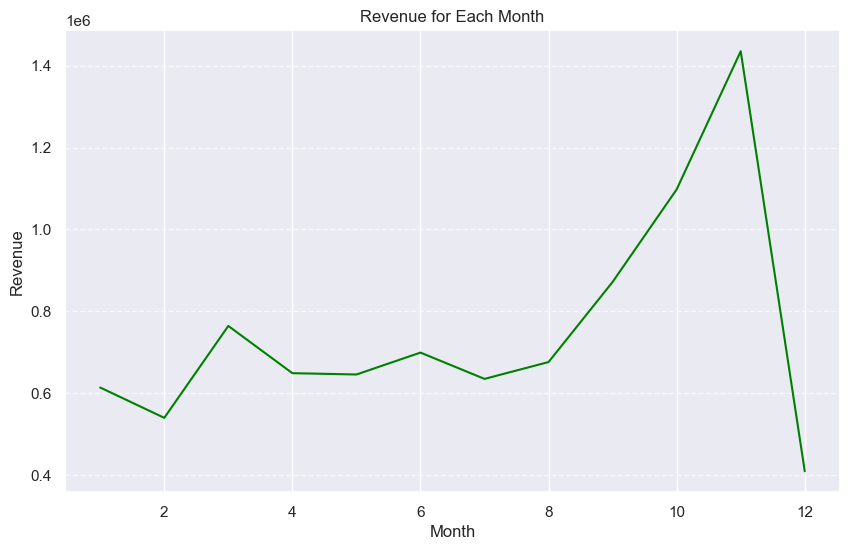

In [14]:
# Plot a graph for revenue of each month
plt.figure(figsize=(10, 6))
monthly_sales.plot(kind='line', color='green')
plt.title('Revenue for Each Month')
plt.xlabel('Month')
plt.ylabel('Revenue')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Looks like November also has the highest Revenue generated.

# Analysis of Top Selling Items

In [15]:
# Group by 'Description' and sum the 'Quantity' values, then sort in descending order
top_items_2010 = year2010.groupby('Description')['Quantity'].sum().sort_values(ascending=False)
top_items_2010 = top_items_2010.head(6)
top_items_2010

Description
WORLD WAR 2 GLIDERS ASSTD DESIGNS     52388
WHITE HANGING HEART T-LIGHT HOLDER    52347
BROCADE RING PURSE                    47573
PACK OF 72 RETRO SPOT CAKE CASES      41749
ASSORTED COLOUR BIRD ORNAMENT         40706
60 TEATIME FAIRY CAKE CASES           34680
Name: Quantity, dtype: int64

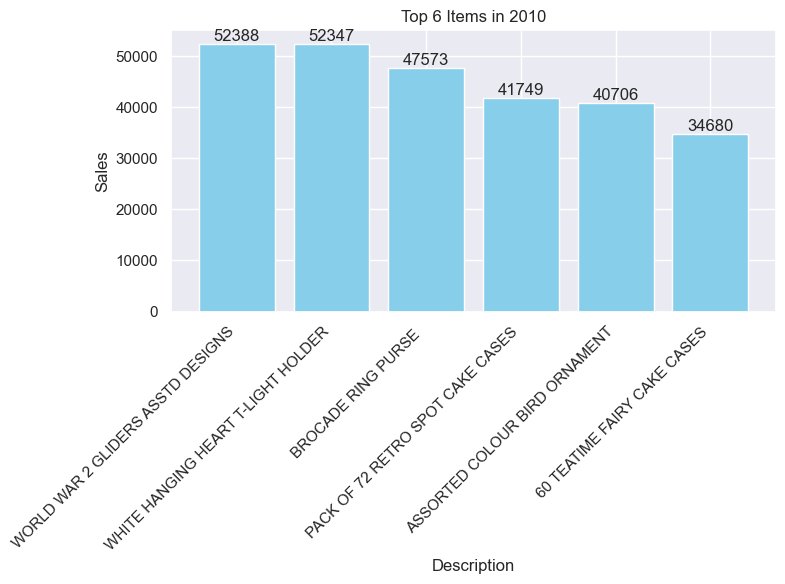

In [16]:
plt.figure(figsize = (8,6))
bars = plt.bar (top_items_2010.index, top_items_2010.values, color='skyblue')

for bar, quantity in zip(bars, top_items_2010.values):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), str(quantity), ha='center', va='bottom')

plt.xlabel('Description')  
plt.ylabel('Sales') 
plt.title('Top 6 Items in 2010') 
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

After getting the top 6 selling items in the website, lets genrate plots for better visualisation

In [17]:
top_items = ["BROCADE RING PURSE ", "WHITE HANGING HEART T-LIGHT HOLDER", 
             "WORLD WAR 2 GLIDERS ASSTD DESIGNS", "PACK OF 72 RETRO SPOT CAKE CASES", 
             "ASSORTED COLOUR BIRD ORNAMENT", "60 TEATIME FAIRY CAKE CASES"]

top_6_data = year2010[year2010['Description'].isin(top_items)]

top_6_data.reset_index(inplace=True)

Line plot for weekly sales of the top 6 selling items

C:\Users\User\AppData\Local\Temp\ipykernel_73756\2707786423.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  top_6_data['InvoiceDate'] = pd.to_datetime(top_6_data['InvoiceDate'])


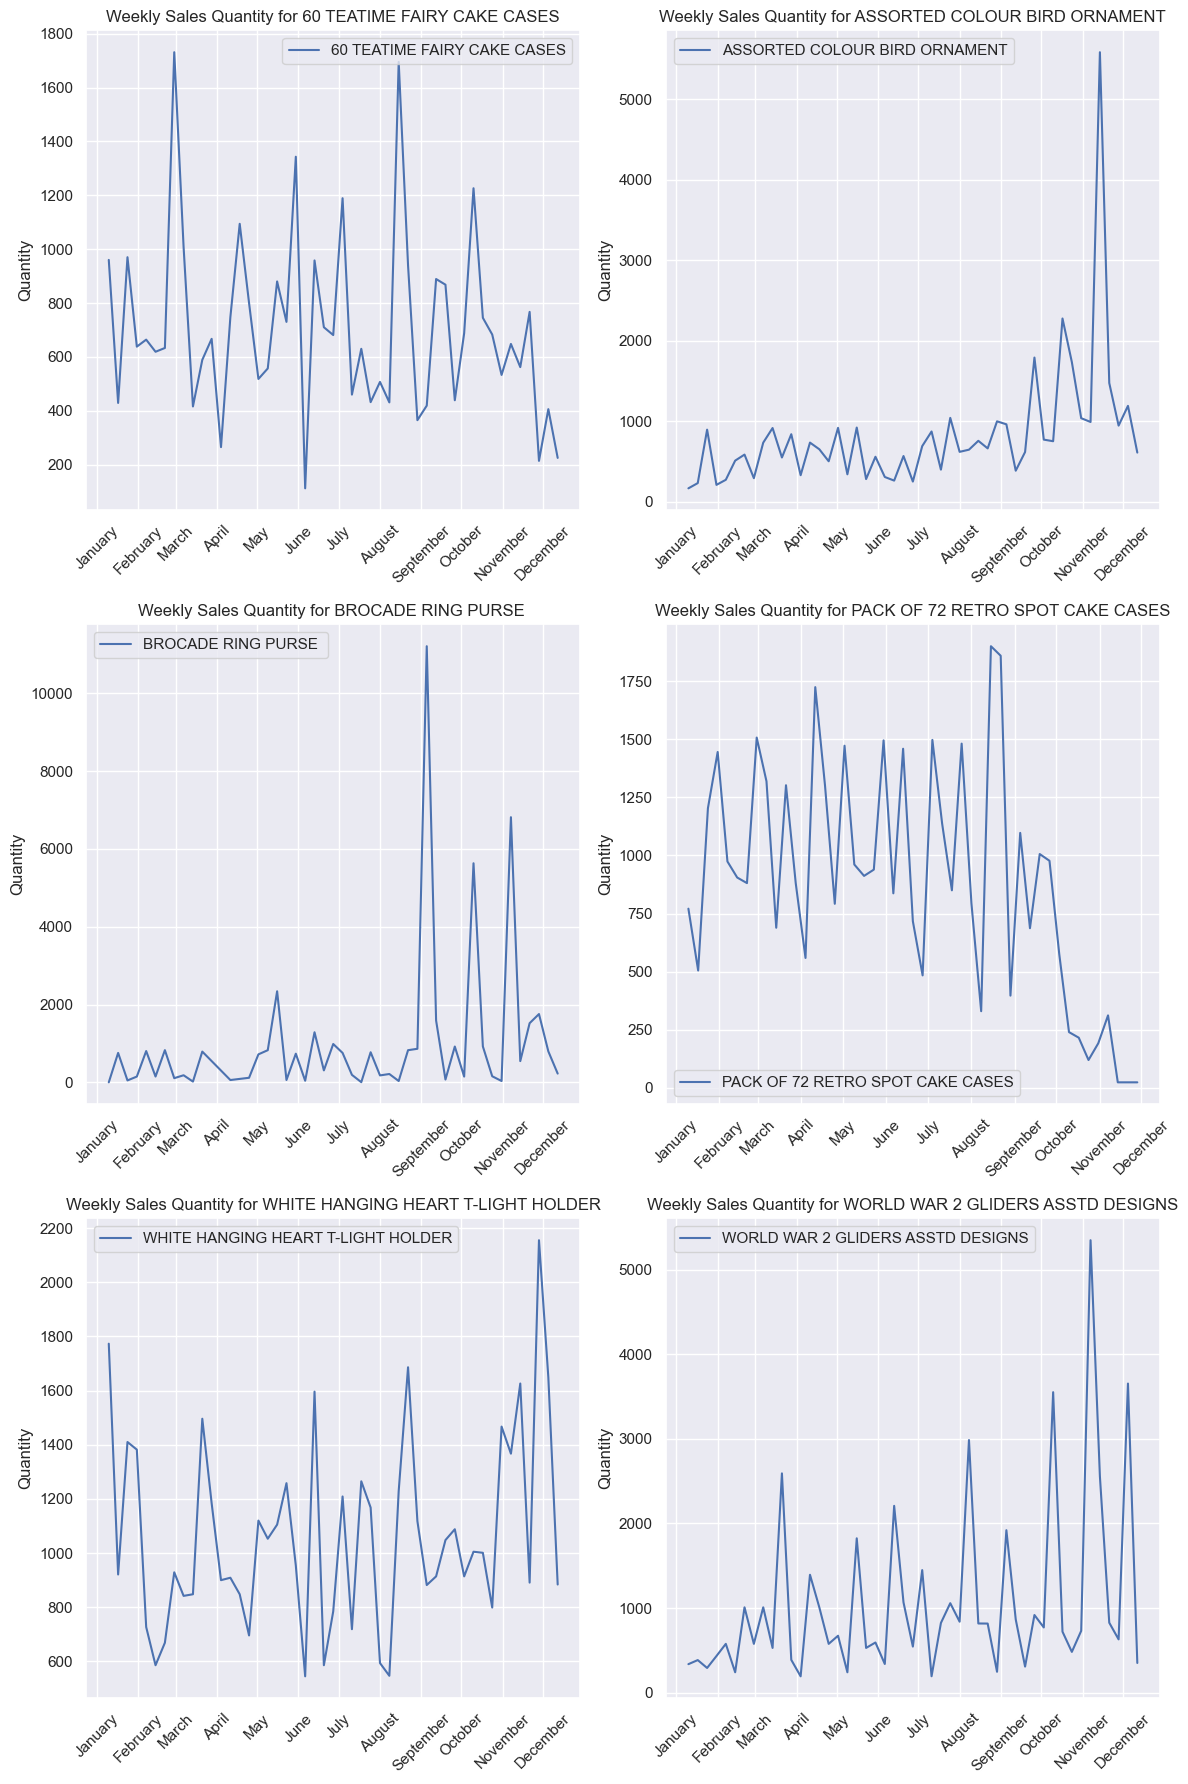

In [18]:
# Convert 'InvoiceDate' to datetime
top_6_data['InvoiceDate'] = pd.to_datetime(top_6_data['InvoiceDate'])

# Group by 'Description' and 'InvoiceDate', summing the quantities
weekly_data = top_6_data.groupby(['Description', pd.Grouper(key='InvoiceDate', freq='W')])['Quantity'].sum()

import matplotlib.dates as mdates

# Create a figure and axes with 3 rows and 2 columns
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

# Plot each top item in a different subplot
items = weekly_data.index.get_level_values('Description').unique()
for i, item in enumerate(items):
    row = i // 2
    col = i % 2
    ax = axes[row, col]
    data = weekly_data.loc[item]
    ax.plot(data.index, data.values, label=item)
    ax.set_ylabel('Quantity')
    ax.set_title('Weekly Sales Quantity for {}'.format(item))
    ax.tick_params(axis='x', rotation=45)
    ax.legend()

    # Set x-axis to display month names
    ax.xaxis.set_major_locator(mdates.MonthLocator())
    ax.xaxis.set_major_formatter(mdates.DateFormatter('%B'))

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()

Autocorrelation vs Lag plots for the items. An autocorrelation vs lag plot, also known as an autocorrelation plot or ACF plot, is a graphical tool used in time series analysis to visualize the autocorrelation function (ACF) of a time series. 

C:\Users\User\AppData\Local\Temp\ipykernel_73756\1782781318.py:1: FutureWarning: The pandas.datetime class is deprecated and will be removed from pandas in a future version. Import from datetime module instead.
  from pandas import datetime


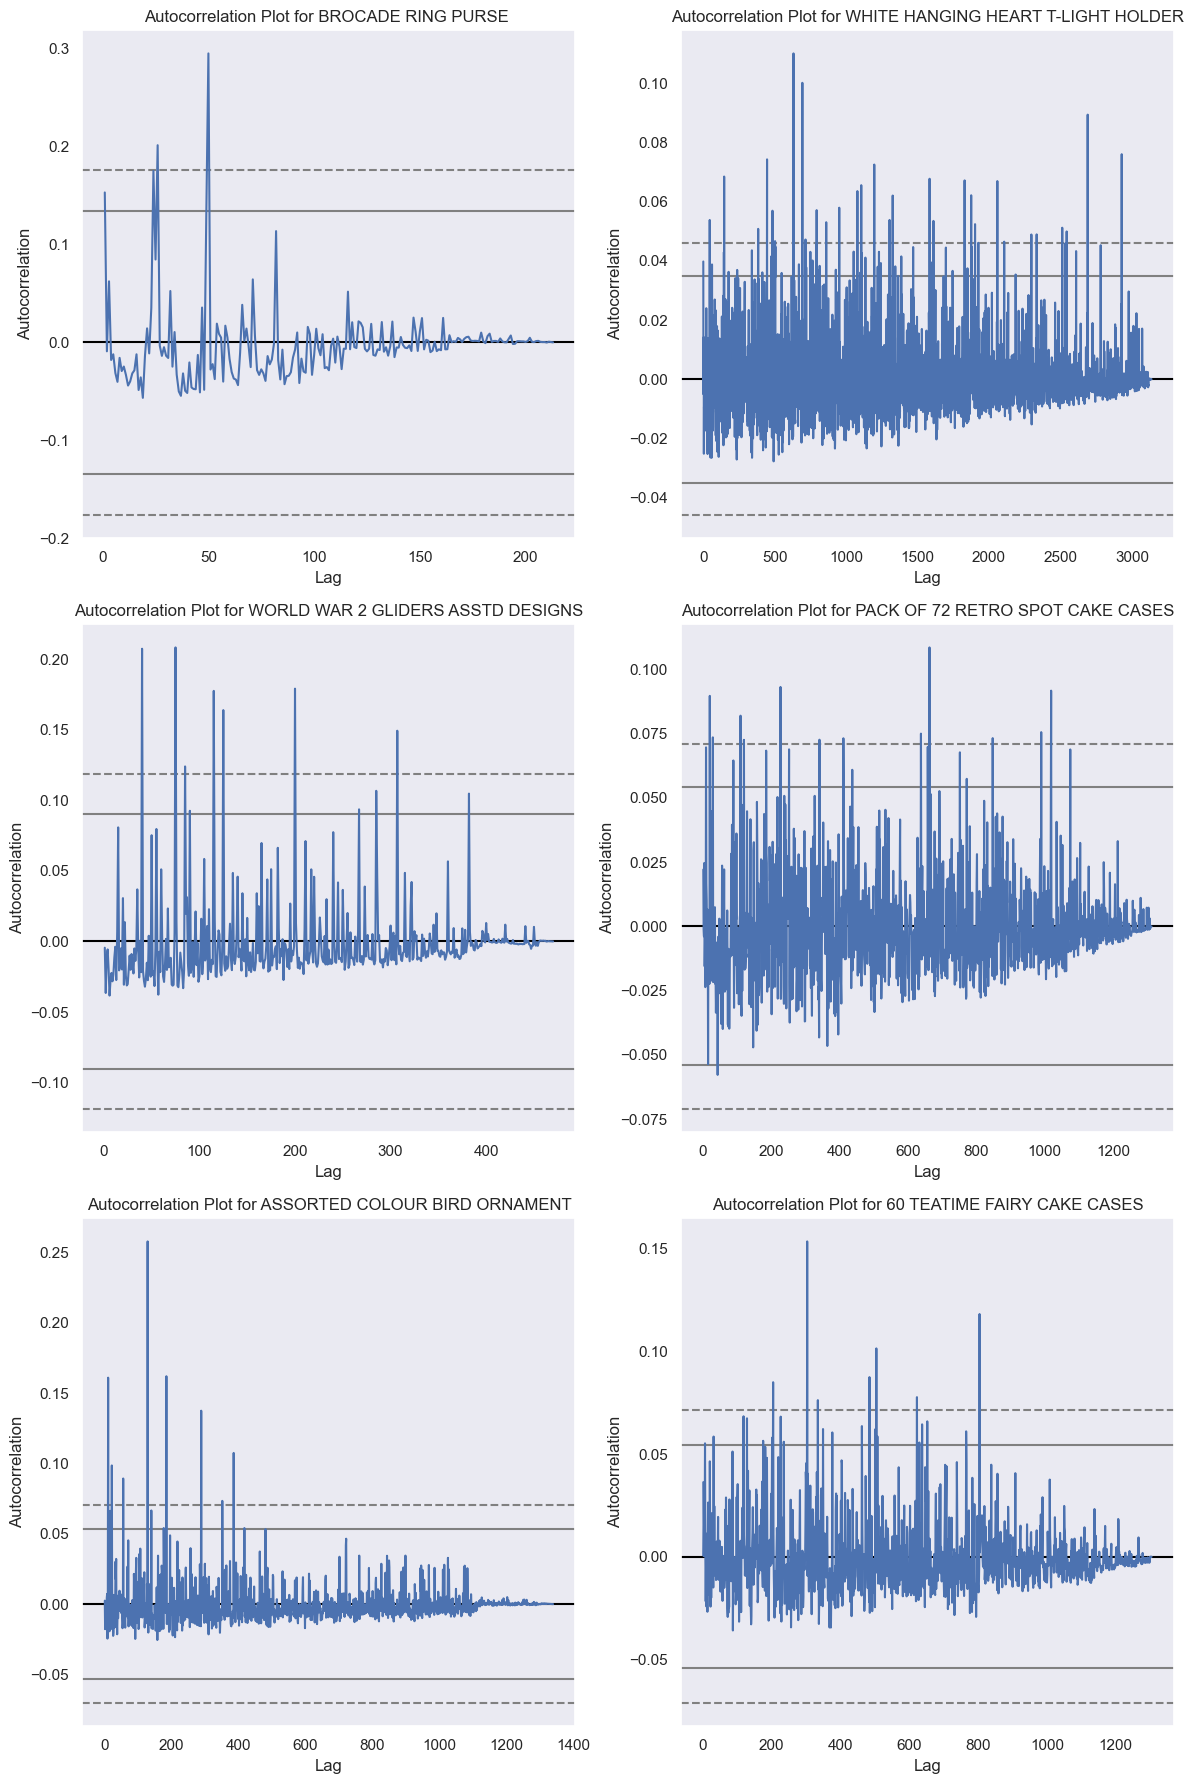

In [19]:
from pandas import datetime
from matplotlib import pyplot
from pandas.plotting import autocorrelation_plot

fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(12, 18))

# Plot autocorrelation for each of the top items
for i, item in enumerate(top_items):
    row = (i) // 2  # Start from the third row
    col = (i) % 2   # Alternate between columns
    ax = axes[row, col]
    series = top_6_data[top_6_data['Description'] == item]['Quantity']
    autocorrelation_plot(series, ax=ax)
    ax.set_title('Autocorrelation Plot for {}'.format(item))

# Adjust layout to prevent overlapping labels
plt.tight_layout()
plt.show()


The steep decreases and fluctuations in autocorrelation implies that the relationship between observations diminishes quickly as the lag increases. This could mean that the pattern or cycle is short-lived and does not persist over longer periods.
Such a pattern might indicate a short-term trend or seasonality in the data, where certain patterns repeat over a short period before dissipating.

**Potential Causes**
-  Seasonal events or periodic fluctuations in the data that occur over short timeframes.
-  Sudden changes in external factors or market conditions that influence the data temporarily.
-  Short-term trends or patterns inherent in the data generating process.

# Customer Segmentation

Now we want to find out customer that bought a lot of products from the retail store and classify them into groups.

In [20]:
year2010['Revenue']=year2010['Price']*year2010['Quantity']

In [21]:
revenue_per_customer = year2010.groupby('Customer ID')['Revenue'].sum()
revenue_per_customer.describe()

count    4.174000e+03
mean     2.165074e+03
std      1.807419e+04
min      1.550000e+00
25%      3.048900e+02
50%      6.881700e+02
75%      1.644810e+03
max      1.044704e+06
Name: Revenue, dtype: float64

In [22]:
invoice_frequency = year2010.groupby('Customer ID')['Invoice'].nunique().reset_index()
invoice_frequency.columns = ['Customer ID', 'InvoiceFrequency']
customer_data = pd.merge(invoice_frequency, revenue_per_customer, on='Customer ID', how='left')
high_value_threshold = customer_data['Revenue'].quantile(0.75)
medium_value_threshold = customer_data['Revenue'].quantile(0.5)

average_frequency = customer_data['InvoiceFrequency'].sum()/len(customer_data)

def value(revenue):
    if revenue >= high_value_threshold:
        return 'High'
    elif revenue >= medium_value_threshold:
        return 'Medium'
    else:
        return 'Low'

def loyalty(InvoiceFrequency):
    if InvoiceFrequency>= average_frequency:
        return 'loyal customer'
    else:
        return 'occasional customer'

customer_data['CustomerValue'] = customer_data['Revenue'].apply(value)
customer_data['Loyalty']= customer_data['InvoiceFrequency'].apply(loyalty)
customer_data.head()

Customer ID  InvoiceFrequency  Revenue CustomerValue              Loyalty
0     12346.0                 2   169.36           Low  occasional customer
1     12347.0                 2  1323.32        Medium  occasional customer
2     12348.0                 1   221.16           Low  occasional customer
3     12349.0                 2  2221.14          High  occasional customer
4     12351.0                 1   300.93           Low  occasional customer

We clustered the customer into ***High*** for customer who have purchased products in the top 25th percentile, ***Medium*** for customers between the 50th percentile and 75th percentile and ***Low*** for the rest of the customers.

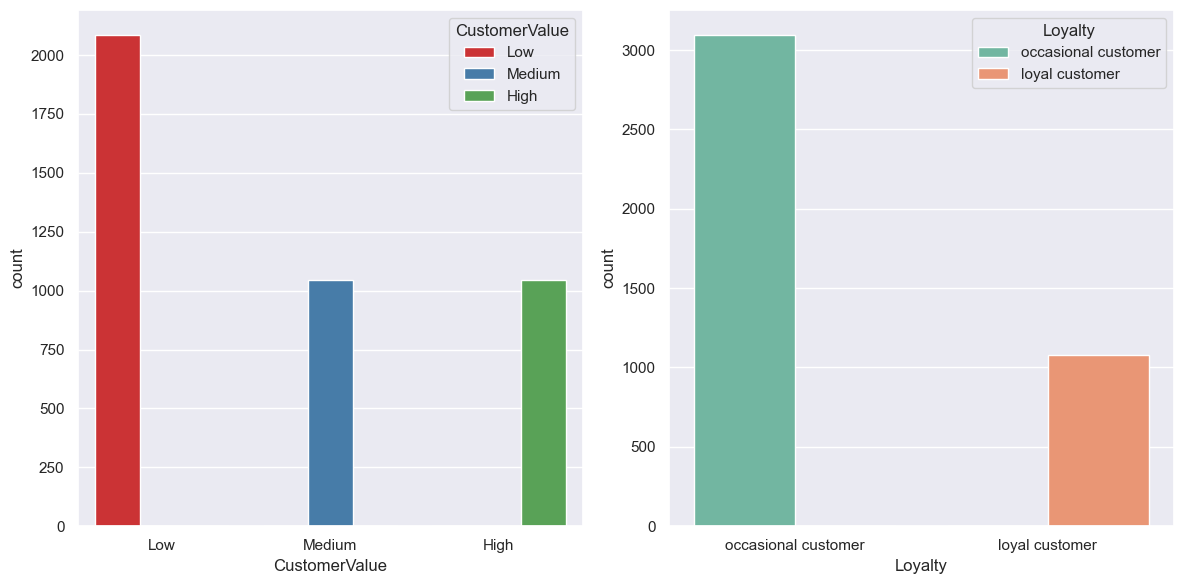

In [23]:
# Plotting
plt.figure(figsize=(12, 6))

# Plot based on CustomerValue
plt.subplot(1, 2, 1)
sb.countplot(x='CustomerValue', data=customer_data, hue='CustomerValue', palette='Set1')

# Plot based on Loyalty
plt.subplot(1, 2, 2)
sb.countplot(x='Loyalty', data=customer_data, hue='Loyalty', palette='Set2')

plt.tight_layout()
plt.show()


# Market Basket Analysis

Market Basket Analysis (MBA) is a data mining technique used in retail and ecommerce to discover associations between products purchased by customers. The goal is to understand the purchasing behavior of customers and uncover relationships between items that are frequently bought together.

***Support***: The frequency of co-occurrence of items in transactions. It measures how frequently an itemset appears in the dataset.

***Confidence***: The probability of seeing the consequent (item B) in a transaction given that the antecedent (item A) is present. It measures the reliability of the rule.

***Lift***: The ratio of the observed support to that expected if the two items were independent. It indicates the strength of the association between two items. A lift greater than 1 indicates that the items are positively correlated, meaning they are likely to be bought together.

In [24]:
!pip install mlxtend==0.23.1

In [25]:
from mlxtend.preprocessing import TransactionEncoder
from mlxtend.frequent_patterns import apriori
from mlxtend.frequent_patterns import association_rules

Remove customer IDs that are unknown, bacause in this context we need to know the value of customer ID for grouping.

In [26]:
df = pd.DataFrame()
df = year2010.copy()

df = df[df['Customer ID'] != 'UNKNOWN']

In [27]:
df['single_transaction'] = df['Customer ID'].astype(str) + '_' + df['Invoice'].astype(str)

In [28]:
# Group by 'Description' and sum the 'Quantity' values
item_quantities_2010 = df.groupby('Description')['Quantity'].sum().sort_values(ascending=True)

print (item_quantities_2010)

Description
FIRE POLISHED GLASS BRACELET RED           1
FOLKART HEART CHRISTMAS DECORATIONS        1
SWALLOW SMALL TUBE MATCHES                 1
DROP DIAMANTE EARRINGS GREEN               1
DROP EARRINGS W FLOWER & LEAF              1
                                       ...  
ASSORTED COLOUR BIRD ORNAMENT          39930
PACK OF 72 RETRO SPOT CAKE CASES       40376
BROCADE RING PURSE                     47375
WHITE HANGING HEART T-LIGHT HOLDER     50669
WORLD WAR 2 GLIDERS ASSTD DESIGNS      52099
Name: Quantity, Length: 4294, dtype: int64


As the size of data, 4294 is too large for a market basket analysis, we remove items which accumulative sales over the year is less than 50 because it does not contribute much to the analysis due to its relatively small support value

In [29]:
# Identify items that accumulated sales quantity is less than 50
items_to_remove = item_quantities_2010[item_quantities_2010 < 50].index

# Filter out items from your DataFrame based on the identified index labels
df_filtered = df[~df['Description'].isin(items_to_remove)]

# Now, let's re-calculate the item quantities for the filtered DataFrame
item_quantities_filtered = df_filtered.groupby('Description')['Quantity'].sum().sort_values(ascending=True)

print(item_quantities_filtered)

Description
ANTIQUE EDWARDIAN DRESSER                50
GOLD FISHING GNOME                       50
CUPID SCENTED CANDLE IN GLASS            50
FRENCH BLUE METAL DOOR SIGN 4            50
EDWARDIAN 2 DRAWER WALL CABINET          50
                                      ...  
ASSORTED COLOUR BIRD ORNAMENT         39930
PACK OF 72 RETRO SPOT CAKE CASES      40376
BROCADE RING PURSE                    47375
WHITE HANGING HEART T-LIGHT HOLDER    50669
WORLD WAR 2 GLIDERS ASSTD DESIGNS     52099
Name: Quantity, Length: 3244, dtype: int64


After filtering items that have accumulative sales of less than 50, the dataset is left with 3244 for the analysis

This step is to view which items are bought concurrently in the same invoice and use binary values to represent in the table

In [30]:
df2 = pd.crosstab(df_filtered['single_transaction'], df_filtered['Description'])
df2.head()

Description           DOORMAT UNION JACK GUNS AND ROSES  \
single_transaction                                        
12346.0_499763                                        0   
12346.0_513774                                        0   
12347.0_529924                                        0   
12347.0_537626                                        0   
12348.0_524140                                        0   

Description          3 STRIPEY MICE FELTCRAFT   4 PURPLE FLOCK DINNER CANDLES  \
single_transaction                                                              
12346.0_499763                              0                               0   
12346.0_513774                              0                               0   
12347.0_529924                              0                               0   
12347.0_537626                              0                               0   
12348.0_524140                              0                               0   

Description          ANIMAL STICKERS   CHERRY BLOSSOM  DECORATIVE FLASK  \
single_transaction                                                        
12346.0_499763                     0                                  0   
12346.0_513774                     0                                  0   
12347.0_529924                     0                                  0   
12347.0_537626                     0                                  0   
12348.0_524140                     0                                  0   

Description          FLAMINGO LIGHTS   HOME SWEET HOME  BLACKBOARD  \
single_transaction                                                   
12346.0_499763                     0                             0   
12346.0_513774                     0                             0   
12347.0_529924                     0                             0   
12347.0_537626                     0                             0   
12348.0_524140                     0                             0   

Description          IVORY PAPER CUP CAKE CASES    PAINT YOUR OWN CANVAS SET  \
single_transaction                                                             
12346.0_499763                                 0                           0   
12346.0_513774                                 0                           0   
12347.0_529924                                 0                           0   
12347.0_537626                                 0                           0   
12348.0_524140                                 0                           0   

Description          RED/WHITE DOT MINI CASES  ...  \
single_transaction                             ...   
12346.0_499763                              0  ...   
12346.0_513774                              0  ...   
12347.0_529924                              0  ...   
12347.0_537626                              0  ...   
12348.0_524140                              0  ...   

Description         ZINC FINISH 15CM PLANTER POTS  ZINC FOLKART SLEIGH BELLS  \
single_transaction                                                             
12346.0_499763                                  0                          0   
12346.0_513774                                  0                          0   
12347.0_529924                                  0                          0   
12347.0_537626                                  0                          0   
12348.0_524140                                  0                          0   

Description         ZINC HEART LATTICE DOUBLE PLANTER  \
single_transaction                                      
12346.0_499763                                      0   
12346.0_513774                                      0   
12347.0_529924                                      0   
12347.0_537626                                      0   
12348.0_524140                                      0   

Description         ZINC HEART LATTICE PLANTER BOWL  \
single_transaction                           

In [31]:
print(df2.shape)

(17424, 3244)


In [32]:
# Encode the dataset into a binary format
basket_input = df2.applymap(lambda x: x > 0)

Usage of CSR matrix for optimizing memory usage. The purpose of using a CSR matrix is to efficiently store and handle large sparse matrices, where the majority of elements are zero. In the context of market basket analysis, the binary matrix typically has many zeros.

In [33]:
from scipy.sparse import csr_matrix

sparse_matrix = csr_matrix(basket_input)
basket_df = pd.DataFrame.sparse.from_spmatrix(sparse_matrix, columns=basket_input.columns)

Market Basket Analysis takes place using the ***Apriori algorithm*** and ***Association rule mining***.

In [35]:
frequent_itemsets = apriori(basket_df, min_support=0.005, use_colnames=True)
frequent_itemsets.sort_values(["support"],axis = 0, ascending = False)

support                                           itemsets
1151  0.157599               (WHITE HANGING HEART T-LIGHT HOLDER)
859   0.096820                         (REGENCY CAKESTAND 3 TIER)
78    0.070937                    (ASSORTED COLOUR BIRD ORNAMENT)
1043  0.068526                   (STRAWBERRY CERAMIC TRINKET BOX)
491   0.062730                         (HOME BUILDING BLOCK WORD)
...        ...                                                ...
2555  0.005051           (TOILET METAL SIGN, WASHROOM METAL SIGN)
1361  0.005051       (IVORY KITCHEN SCALES, BLACK KITCHEN SCALES)
1351  0.005051  (LADIES & GENTLEMEN METAL SIGN, BEWARE OF THE ...
2661  0.005051  (RED SPOTTY PLATE , BLUE  SPOTTY CUP, PINK  SP...
0     0.005051                        ( RED/WHITE DOT MINI CASES)

[3078 rows x 2 columns]

In [36]:
rules = association_rules(frequent_itemsets, metric="lift")
rules.sort_values(["lift"],axis = 0, ascending = False)

antecedents  \
6378  (CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN F...   
6391  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...   
6375  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...   
6394  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...   
6151  (CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN F...   
...                                                 ...   
2087               (WHITE HANGING HEART T-LIGHT HOLDER)   
2519                         (REGENCY CAKESTAND 3 TIER)   
2518                     (REX CASH+CARRY JUMBO SHOPPER)   
251                     (BAKING SET 9 PIECE RETROSPOT )   
250                (WHITE HANGING HEART T-LIGHT HOLDER)   

                                            consequents  antecedent support  \
6378  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...            0.005797   
6391  (CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN F...            0.005510   
6375  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...            0.005739   
6394  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...            0.005624   
6151  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...            0.005797   
...                                                 ...                 ...   
2087                        (PACK OF 6 BIRDY GIFT TAGS)            0.157599   
2519                     (REX CASH+CARRY JUMBO SHOPPER)            0.096820   
2518                         (REGENCY CAKESTAND 3 TIER)            0.053891   
251                (WHITE HANGING HEART T-LIGHT HOLDER)            0.043561   
250                     (BAKING SET 9 PIECE RETROSPOT )            0.157599   

      consequent support   support  confidence        lift  leverage  \
6378            0.005510  0.005165    0.891089  161.732673  0.005133   
6391            0.005797  0.005165    0.937500  161.732673  0.005133   
6375            0.005624  0.005165    0.900000  160.016327  0.005133   
6394            0.005739  0.005165    0.918367  160.016327  0.005133   
6151            0.005854  0.005280    0.910891  155.601631  0.005246   
...                  ...       ...         ...         ...       ...   
2087            0.038108  0.006026    0.038237    1.003387  0.000020   
2519            0.053891  0.005108    0.052756    0.978943 -0.000110   
2518            0.096820  0.005108    0.094782    0.978943 -0.000110   
251             0.157599  0.006141    0.140975    0.894519 -0.000724   
250             0.043561  0.006141    0.038966    0.894519 -0.000724   

      conviction  zhangs_metric  
6378    9.131230       0.999611  
6391   15.907254       0.999323  
6375    9.943756       0.999487  
6394   12.179695       0.999372  
6151   11.156527       0.999366  
...          ...            ...  
2087    1.000134       0.004007  
2519    0.998802      -0.023262  
2518    0.997748      -0.022230  
251     0.980648      -0.109758  
250     0.995219      -0.122792  

[6416 rows x 10 columns]

In [37]:
#remove duplicate
rules_no_duplicates = rules.drop_duplicates(subset=["lift"])

In [38]:
rules_no_duplicates.describe()

antecedent support  consequent support      support   confidence  \
count         4279.000000         4279.000000  4279.000000  4279.000000   
mean             0.030367            0.033494     0.007133     0.407057   
std              0.032262            0.027865     0.002730     0.246166   
min              0.005280            0.005280     0.005051     0.032047   
25%              0.011019            0.014865     0.005510     0.186306   
50%              0.018710            0.025999     0.006198     0.375228   
75%              0.038711            0.044020     0.007691     0.581989   
max              0.157599            0.157599     0.037075     1.000000   

              lift     leverage   conviction  zhangs_metric  
count  4279.000000  4279.000000  4279.000000    4279.000000  
mean     22.426940     0.006089          inf       0.878911  
std      26.275853     0.002607          NaN       0.167316  
min       0.894519    -0.000724     0.980648      -0.122792  
25%       6.783827     0.004894     1.184180       0.881113  
50%      11.971717     0.005480     1.545824       0.937405  
75%      26.114694     0.006686     2.315816       0.979055  
max     161.732673     0.030455          inf       1.000000

Generate top 20 pairs of items with highest lift values. This means that these 20 pairs of items are bought together most oftenly.

In [39]:
rules_no_duplicates.dtypes

antecedents            object
consequents            object
antecedent support    float64
consequent support    float64
support               float64
confidence            float64
lift                  float64
leverage              float64
conviction            float64
zhangs_metric         float64
dtype: object

In [40]:
# Top 20 pairs with highest lift
high_20 = rules_no_duplicates.nlargest(20, 'lift').copy()
high_20.sort_values(["lift"],axis = 0, ascending = False)

antecedents  \
6378  (CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN F...   
6375  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...   
6394  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...   
6151  (CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN F...   
6166  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...   
6362  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...   
6158  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...   
6128  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...   
6119  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...   
5320  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...   
1668                               (KIDS RAIN MAC BLUE)   
6218  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...   
6373  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...   
6368  (CHILDS GARDEN TROWEL BLUE , CHILDS GARDEN FOR...   
6123  (CHILDS GARDEN TROWEL BLUE , CHILDS GARDEN FOR...   
5391  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...   
6187  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...   
6179  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...   
6371  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...   
6361  (CHILDS GARDEN TROWEL BLUE , CHILDS GARDEN FOR...   

                                            consequents  antecedent support  \
6378  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...            0.005797   
6375  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...            0.005739   
6394  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...            0.005624   
6151  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...            0.005797   
6166  (CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN F...            0.005854   
6362  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...            0.005682   
6158  (CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN F...            0.005624   
6128  (CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN F...            0.005510   
6119  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...            0.005739   
5320  (CHILDRENS GARDEN GLOVES PINK, CHILDS GARDEN F...            0.005854   
1668                               (KIDS RAIN MAC PINK)            0.005797   
6218  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...            0.005624   
6373  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...            0.005395   
6368  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...            0.005797   
6123  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN F...            0.005854   
5391  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN T...            0.006887   
6187  (CHILDS GARDEN TROWEL BLUE , CHILDRENS GARDEN ...            0.005682   
6179  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN T...            0.005739   
6371  (CHILDS GARDEN FORK PINK, CHILDRENS GARDEN GLO...            0.005510   
6361  (CHILDRENS GARDEN GLOVES BLUE, CHILDS GARDEN T...            0.005567   

      consequent support   support  confidence        lift  leverage  \
6378            0.005510  0.005165    0.891089  161.732673  0.005133   
6375            0.005624  0.005165    0.900000  160.016327  0.005133   
6394            0.005739  0.005165    0.918367  160.016327  0.005133   
6151            0.005854  0.005280    0.910891  155.601631  0.005246   
6166            0.005797  0.005280    0.901961  155.601631  0.005246   
6362            0.005854  0.005165    0.909091  155.294118  0.005132   
6158            0.006084  0.005280    0.938776  154.313439  0.005246   
6128            0.006084  0.005165    0.937500  154.103774  0.005132   
6119            0.005854  0.005165    0.900000  153.741176  0.005132   
5320            0.006084  0.005452    0.931373  153.096559  0.005417   
1668            0.005969  0.005108    0.881188  147.632902  0.005073   
6218            0.006887  0.005395    0.959184  139.273469  0.005356   
6373            0.006887  0.005165    0.957447  139.021277  0.005128   
6368            0.006428  0.005165    0.891089  138.628006  0.005128   
6123            0.006428  0.005165    0.882353  137.268908  0.00

Generate a correlation plot to visualize top 20 items in the same basket.

C:\Users\User\AppData\Local\Temp\ipykernel_73756\2466590199.py:8: UserWarning: Tight layout not applied. The left and right margins cannot be made large enough to accommodate all axes decorations.
  plt.tight_layout()  # Adjust layout to prevent clipping of labels


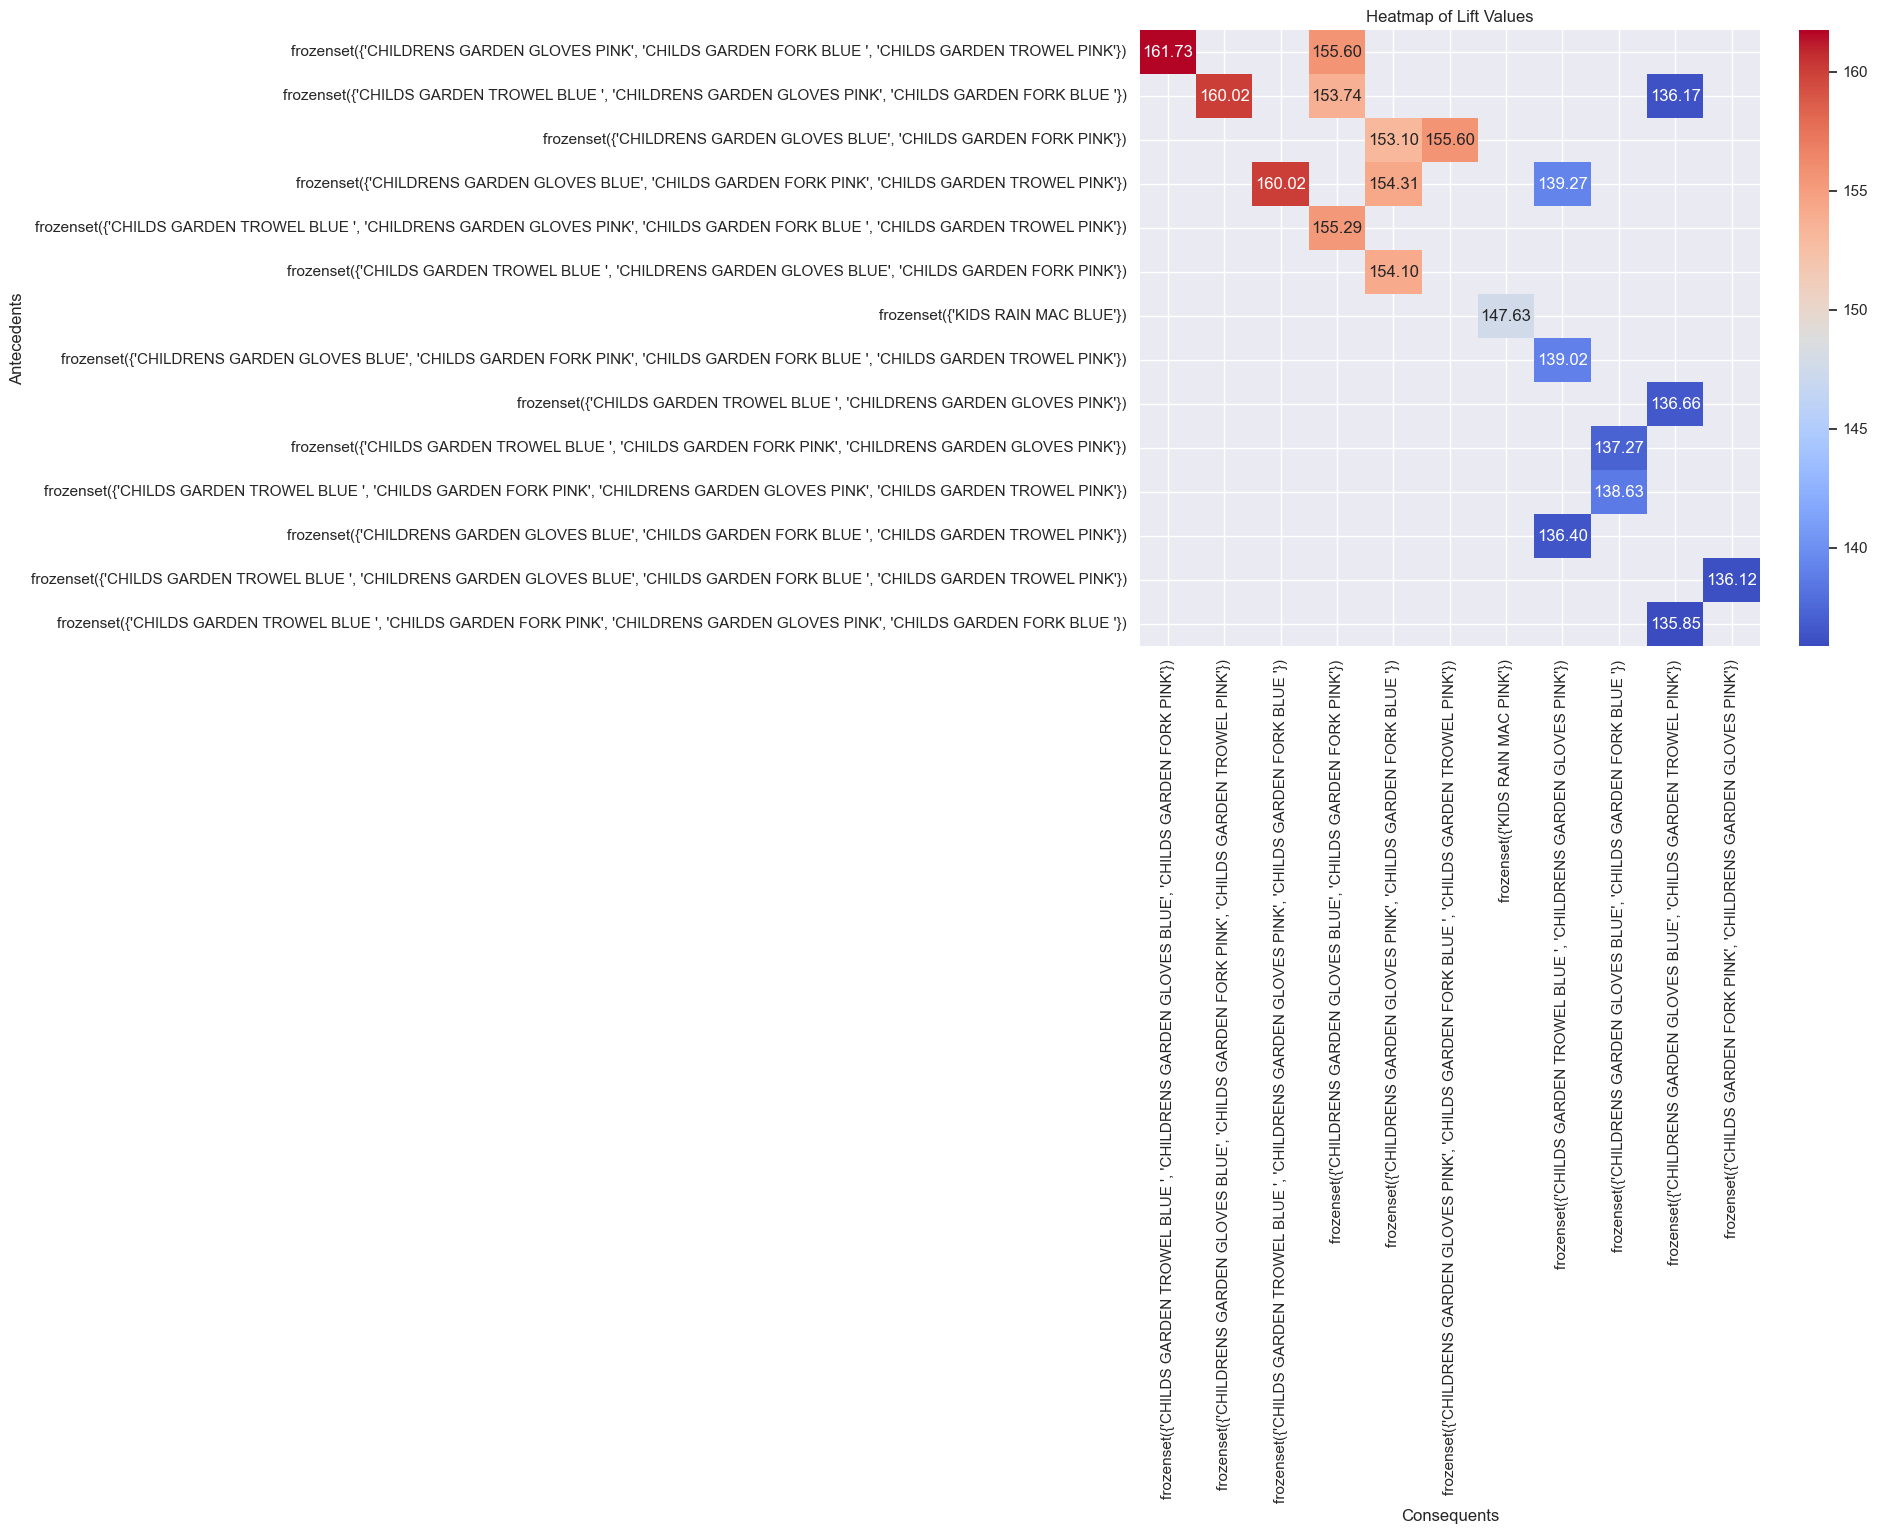

In [41]:
lift_matrix = high_20.pivot(index='antecedents', columns='consequents', values='lift')

plt.figure(figsize=(10, 8))
sb.heatmap(lift_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Heatmap of Lift Values')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.tight_layout()  # Adjust layout to prevent clipping of labels
plt.show()

The items in the same basket as seen from the correlation plot are mostly kids items that are of the same kind but different variations. (for example, either different designs or colour of the same product are purchased together).This may suggest that this platform is a kids products wholesaler. This is common in retail because most retailers will focus on a single category of product to sell.

Now lets generate a correlation plot with the 20 pairs with lowest lift values.

In [42]:
# Top 20 pairs with lowest lift
low_20 = rules_no_duplicates.nsmallest(20, 'lift').copy()

While this table shows the 20 pairs with lowest lifts, it does not mean that these items have no correlation between each other. Most of the lift values are >=1 which means that they are some sort of complement to each other just that the correlation is not that strong.

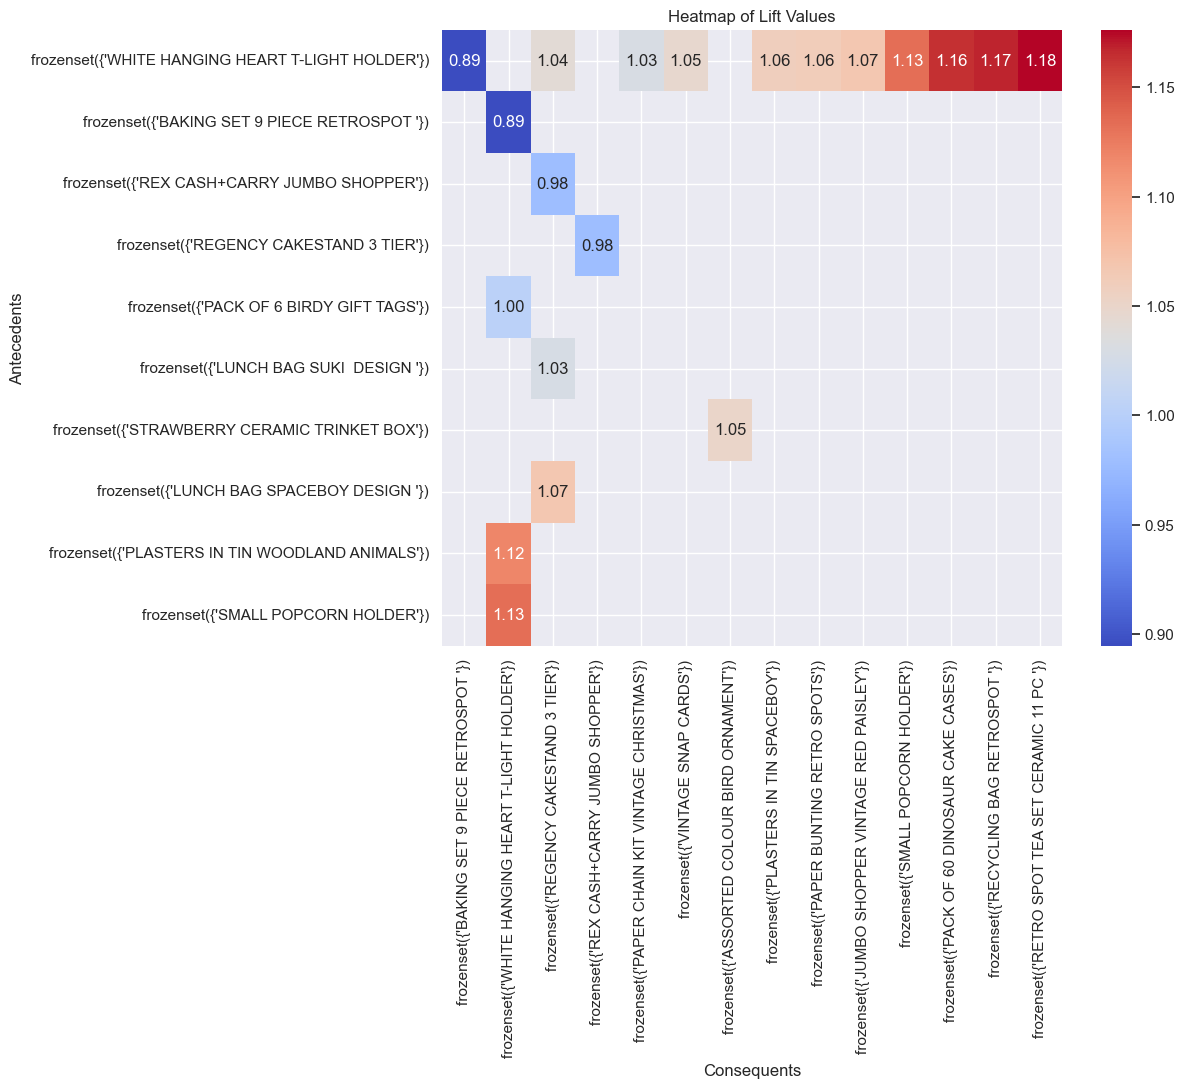

In [43]:
lift_matrix = low_20.pivot(index='antecedents', columns='consequents', values='lift')

plt.figure(figsize=(10, 8))
sb.heatmap(lift_matrix, cmap='coolwarm', annot=True, fmt=".2f", cbar=True)
plt.title('Heatmap of Lift Values')
plt.xlabel('Consequents')
plt.ylabel('Antecedents')
plt.show()

Now lets plot scatter plots between association rules for further analysis.

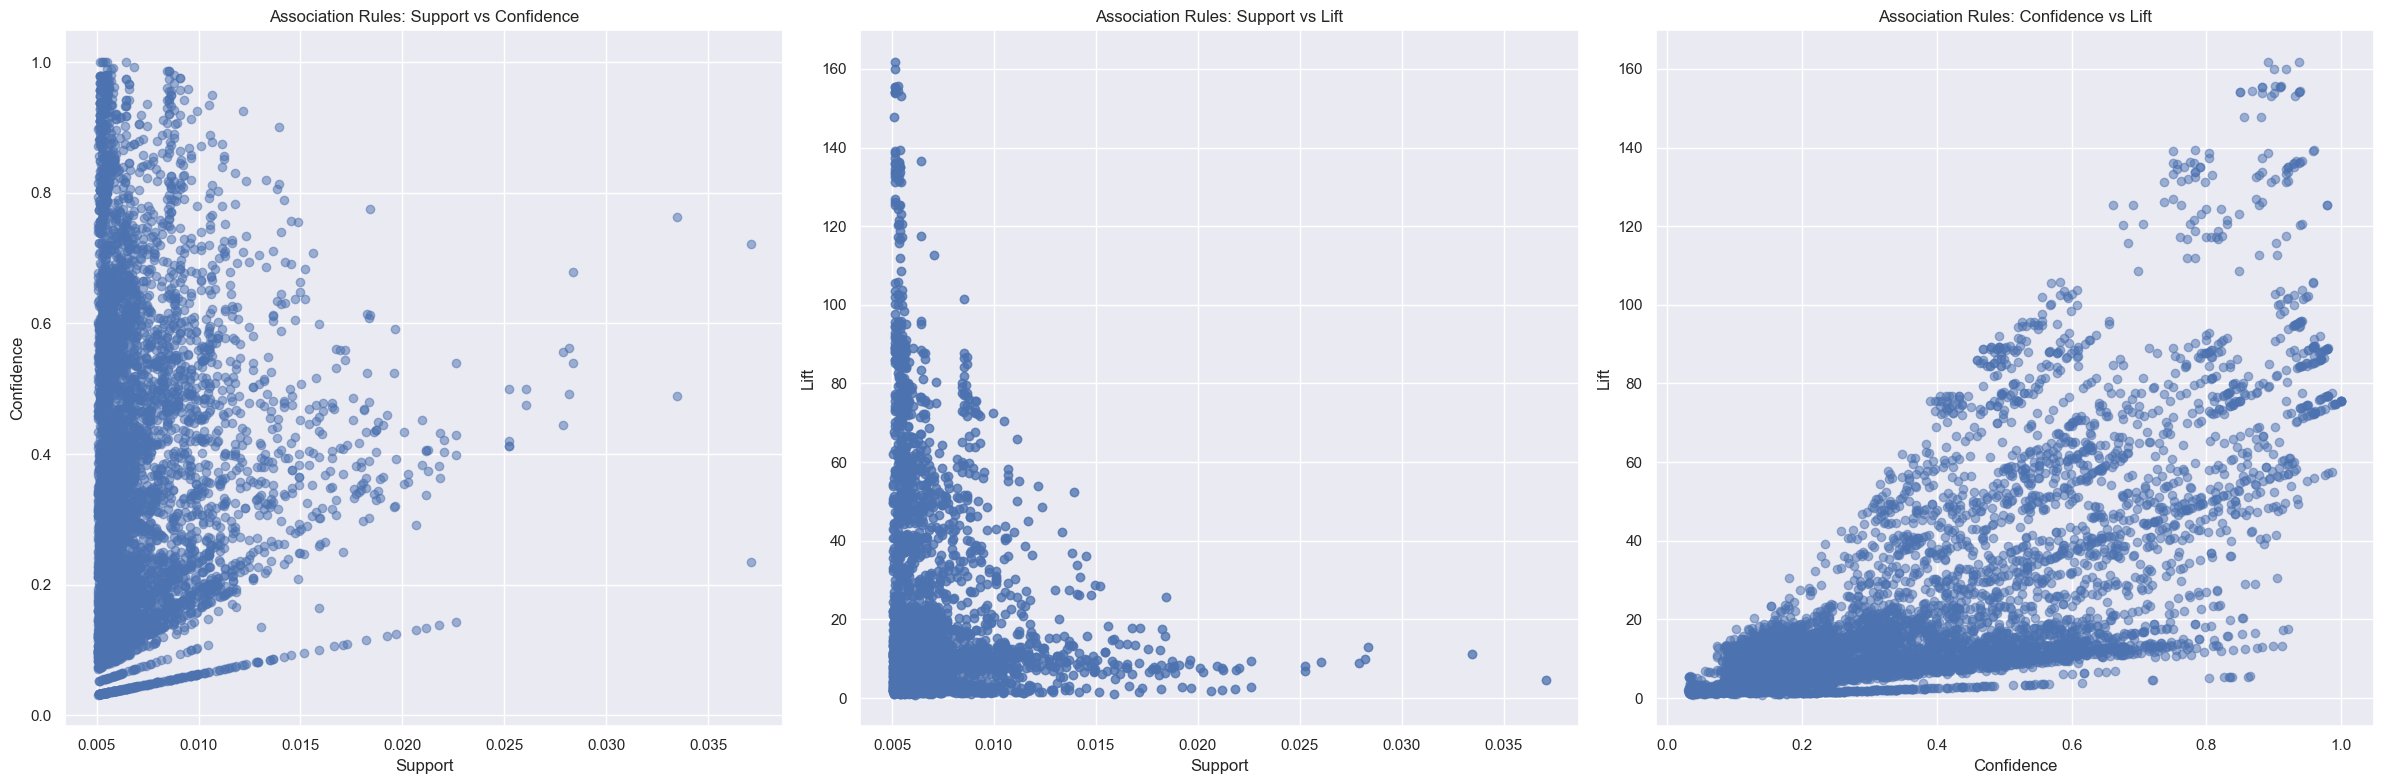

In [44]:
# Create a figure with three subplots arranged horizontally
fig, axes = plt.subplots(1, 3, figsize=(24, 8))

# Plot Support vs Confidence
axes[0].scatter(rules['support'], rules['confidence'], alpha=0.5)
axes[0].set_xlabel('Support')
axes[0].set_ylabel('Confidence')
axes[0].set_title('Association Rules: Support vs Confidence')

# Plot Support vs Lift
axes[1].scatter(rules['support'], rules['lift'], alpha=0.5)
axes[1].set_xlabel('Support')
axes[1].set_ylabel('Lift')
axes[1].set_title('Association Rules: Support vs Lift')

# Plot Confidence vs Lift
axes[2].scatter(rules['confidence'], rules['lift'], alpha=0.5)
axes[2].set_xlabel('Confidence')
axes[2].set_ylabel('Lift')
axes[2].set_title('Association Rules: Confidence vs Lift')

# Adjust layout
plt.tight_layout()

# Show the plot
plt.show()

The results in these 3 plots can be commonly seen in a retail setting because when the retailer purchase goods they purchase in bulk at once and they purchase infrequently. This explains why although our dataset has low support, the confidence can be very high.

## Geospatial Analysis

Let us examine sales data across various countries using visualization tools like choropleth map.

In [45]:
# Find out no. of countries that are missing
missing_country = year2010['Country'].isna().sum()
print("No. of missing countries: ",missing_country)

No. of missing countries:  0


In [46]:
# View number of countries in this dataset
countries = year2010['Country'].unique()
print(countries)
print("No. of countries: ",len(countries))

['United Kingdom' 'Sweden' 'EIRE' 'France' 'Germany' 'Belgium' 'Spain'
 'USA' 'Denmark' 'Netherlands' 'Greece' 'Japan' 'Finland'
 'Channel Islands' 'Unspecified' 'Cyprus' 'Portugal' 'Malta' 'Bahrain'
 'RSA' 'Austria' 'United Arab Emirates' 'Switzerland' 'Australia' 'Poland'
 'Italy' 'Bermuda' 'Hong Kong' 'Singapore' 'Thailand' 'Israel' 'Lithuania'
 'Norway' 'Nigeria' 'West Indies' 'Lebanon' 'Korea' 'Brazil' 'Canada'
 'Iceland']
No. of countries:  40


In [47]:
pip install folium

Note: you may need to restart the kernel to use updated packages.


In [48]:
# Extract sales data, group by 'Country' and sum the 'TotalSales' for each country
sales_df = year2010.groupby('Country')['TotalSales'].sum()

# Convert the groupby Series to a DataFrame
sales_df = sales_df.reset_index()

# Map 'EIRE' to 'Ireland' as GeoJSON data only recognises 'Ireland'
country_name_mapping = {'EIRE': 'Ireland'}

# Apply the mapping to the 'Country' column in sales data
sales_df['Country'] = sales_df['Country'].map(country_name_mapping).fillna(sales_df['Country'])

# Sort the sales data by 'TotalSales' in descending order and reset the index
sales_df = sales_df.sort_values(by='TotalSales', ascending=False).reset_index(drop=True)

# Add 1 to the index to start it from 1
sales_df.index = sales_df.index + 1

# Display the aggregated sales data
print(sales_df)


                 Country  TotalSales
1         United Kingdom  7755933.94
2                Ireland   338817.84
3            Netherlands   251017.59
4                Germany   174225.01
5                 France   126492.37
6                 Sweden    49228.41
7                Denmark    48983.19
8            Switzerland    40712.99
9                  Spain    35133.50
10             Australia    30042.25
11       Channel Islands    23357.14
12               Belgium    20107.83
13              Portugal    19038.65
14                Greece    13674.72
15                 Italy    13081.16
16                 Japan     9722.02
17               Austria     9635.99
18                Norway     9542.53
19  United Arab Emirates     7890.75
20                Cyprus     7802.77
21               Finland     6366.14
22           Unspecified     6186.22
23             Lithuania     4892.68
24                   USA     4339.62
25             Singapore     4037.77
26             Hong Kong     3922.26
2

### Visualizing sales in each country using choropleth map

In [49]:
import folium

# Create a Folium map centered at a specific location
m = folium.Map(location=[0, 0], zoom_start=2)

# Add built-in GeoJSON data for world countries
folium.GeoJson(
    data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json',
    name='geojson',
    style_function=lambda feature: {
        'fillColor': 'green',  # Default color
        'color': 'black',
        'weight': 1,
    }
).add_to(m)

# Add choropleth layer
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json',
    name='choropleth',
    data=sales_df,
    columns=['Country', 'TotalSales'],
    key_on='feature.properties.name',
    fill_color='YlGn',  # Color scale for the choropleth
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sales of the Product'
).add_to(m)

# Add a layer control panel to the map
folium.LayerControl().add_to(m)

# Display the map
m

It seems the map shows an extreme data skewness towards sales in United Kingdom, which limits our ability to view and understand the relative performance of regions outside the United Kingdom. Let us see the percentage of the Sales that is done in United Kingdom.

In [50]:
uk_count = year2010[year2010['Country'] == 'United Kingdom']['Country'].count()
all_count = year2010['Country'].count()
uk_perc = uk_count/all_count
print("Percentage of Sales in United Kingdom:")
print(str('{0:.2f}%').format(uk_perc*100))

Percentage of Sales in United Kingdom:
92.46%


It is shown that the Sales are indeed dominated in United Kingdom. Let us extract United Kingdom out from our dataset and see if we are able to visualize the data better.

In [51]:
# Extract data for countries except UK
sales_df_exceptUK = sales_df[sales_df['Country'] != 'United Kingdom']

In [52]:
import folium

# Create a Folium map centered at a specific location
m = folium.Map(location=[0, 0], zoom_start=2)

# Add built-in GeoJSON data for world countries
folium.GeoJson(
    data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json',
    name='geojson',
    style_function=lambda feature: {
        'fillColor': 'green',  # Default color
        'color': 'black',
        'weight': 1,
    }
).add_to(m)

# Add choropleth layer
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json',
    name='choropleth',
    data=sales_df_exceptUK,
    columns=['Country', 'TotalSales'],
    key_on='feature.properties.name',
    fill_color='YlGn',  # Color scale for the choropleth
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sales of the Product'
).add_to(m)

# Add a layer control panel to the map
folium.LayerControl().add_to(m)

# Display the map
m

Looks like most of the sales are mainly in Europe, let us zoom in and focus on the European countries.

In [53]:
# List of European countries
European_countries = ['Austria', 'Belgium', 'Denmark','Finland','France', 'Germany', 'Greece', 'Iceland', 'Ireland', 
'Italy', 'Lithuania', 'Malta', 'Netherlands', 'Norway', 'Poland', 'Portugal', 'Spain', 'Sweden', 'Switzerland']

# Filter sales data for European countries only
sales_df_Europe = sales_df[sales_df['Country'].isin(European_countries)]

# Create a Folium map centered at the approximate center of Europe
m = folium.Map(location=[54.5259614, 15.2551187], zoom_start=4)

# Add built-in GeoJSON data for world countries
folium.GeoJson(
    data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json',
    name='geojson',
    style_function=lambda feature: {
        'fillColor': 'green',  # Default color
        'color': 'black',
        'weight': 1,
    }
).add_to(m)

# Add choropleth layer
folium.Choropleth(
    geo_data='https://raw.githubusercontent.com/python-visualization/folium/master/examples/data/world-countries.json',
    name='choropleth',
    data=sales_df_Europe,
    columns=['Country', 'TotalSales'],
    key_on='feature.properties.name',
    fill_color='YlGn',  # Color scale for the choropleth
    fill_opacity=0.7,
    line_opacity=0.2,
    legend_name='Sales of the Product'
).add_to(m)

# Add a layer control panel to the map
folium.LayerControl().add_to(m)

# Display the map
m

In [54]:
pip install geopy

Note: you may need to restart the kernel to use updated packages.


In [55]:
# Predefined dictionary of country coordinates
country_coordinates = {
    'Austria': (47.5162, 14.5501),
    'Belgium': (50.8503, 4.3517),
    'Denmark': (56.2639, 9.5018),
    'Finland': (61.9241, 25.7482),
    'France': (46.6034, 1.8883),
    'Germany': (51.1657, 10.4515),
    'Greece': (39.0742, 21.8243),
    'Iceland': (64.9631, -19.0208),
    'Ireland': (53.1424, -7.6921),
    'Italy': (41.8719, 12.5674),
    'Lithuania': (55.1694, 23.8813),
    'Malta': (35.9375, 14.3754),
    'Netherlands': (52.1326, 5.2913),
    'Norway': (60.472, 8.4689),
    'Poland': (51.9194, 19.1451),
    'Portugal': (39.3999, -8.2245),
    'Spain': (40.4637, -3.7492),
    'Sweden': (60.1282, 18.6435),
    'Switzerland': (46.8182, 8.2275)
}

The color in Netherlands, France and Germany seems similar, now let us visualize the sales with proportional symbol graph.

In [56]:
# Create a Folium map centered at the approximate center of Europe
m = folium.Map(location=[54.5259614, 15.2551187], zoom_start=4)

# Add CircleMarker for each country with total sales proportional to radius
for country, coordinates in country_coordinates.items():
    if country in sales_df_Europe['Country'].values:
        total_sales = sales_df_Europe[sales_df_Europe['Country'] == country]['TotalSales'].values[0]
        folium.CircleMarker(
            location=[coordinates[0], coordinates[1]],
            radius=total_sales / 5000,  # Adjust the radius based on total sales
            color='green',
            fill=True,
            fill_color='green',
            fill_opacity=0.6,
            popup=country + ': $' + str(total_sales)
        ).add_to(m)

# Display the map
m

From the visualizations of the Sales in each country, we can conclude that most of the Sales are from European countries, with United Kingdom dominating most of the sales, probably because the company is UK-based and registered. 

Also, we can note that there are significantly more customers in Ireland, Netherlands, Germany and France. Therefore, the company can build warehouses in these countries to store their overwhelming sales especially during peak period.